This notebook use mcvine.phonon.powderSQE.from_phonon_data_dir.
The calculation produces pretty good result. However, it seems that we may need more points at qx and qy directions, or we should use a random sampling of the Q space (MC).

In [1]:
import numpy as np, os, glob

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
import histogram.hdf as hh, histogram as H

In [4]:
workdir = '_tmp.model-coherent-SQE'
!mkdir -p {workdir}
%cd {workdir}

/home/lj7/dv/mcvine/phonon/tests/phonon/_tmp.model-coherent-SQE


# Force constants

In [5]:
ls ../../data/graphite/

FORCE_CONSTANTS  POSCAR  SPOSCAR


## From SPOSCAR and POSCAR we can know supercell grid

In [6]:
!head -n 10 ../../data/graphite/SPOSCAR

C
   1.0
    14.6771349835800002    0.0000000000000000    0.0000000000000000
    -7.3385674918200010   12.7107717505800011    0.0000000000000000
     0.0000000000000000    0.0000000000000000    6.6542290476200003
 144
Direct
  0.0000000000000000  0.0000000000000000  0.2500000000000000
  0.1666666666666667  0.0000000000000000  0.2500000000000000
  0.3333333333333333  0.0000000000000000  0.2500000000000000


In [7]:
cat ../../data/graphite//POSCAR

C
    1.0
       2.44618916393 0.00000000000   0.00000000000           
      -1.22309458197 2.11846195843   0.00000000000
       0.00000000000   0.00000000000 6.65422904762 
  4
Direct
        0.00000000 0.00000000 0.25000000
        0.00000000 0.00000000 0.75000000
        0.33333333 0.66666667 0.25000000
        0.66666667 0.33333333 0.75000000


In [8]:
6*6*4

144

# Compute phonon data

In [9]:
!mkdir -p phonon
!cp ../../data/graphite/* phonon/
%cd phonon

/home/lj7/dv/mcvine/phonon/tests/phonon/_tmp.model-coherent-SQE/phonon


In [10]:
from mcvine.phonon.from_phonopy import make_all

In [11]:
%%time
make_all(
    species=['C'], supercell_dims=[6,6,1],
    qgrid_dims=[101,101,31],
    fix_pols_phase=True,
    force_constants='FORCE_CONSTANTS', poscar='POSCAR',
)
%cd -

* Constructing Q array
* Calling phonopy to compute eigen values and eigen vectors
* Writing out freqencies
* Fixing and writing out polarizations
* Fixing phase: exp(-i Q.d)
203.120864564
/home/lj7/dv/mcvine/phonon/tests/phonon/_tmp.model-coherent-SQE
CPU times: user 10min 8s, sys: 15min 32s, total: 25min 41s
Wall time: 2min 19s


# Compute IQE

In [14]:
import mcvine.phonon.powderSQE as mpp
reload(mpp)

<module 'mcvine.phonon.powderSQE' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcvine/phonon/powderSQE.py'>

In [ ]:
%%time
from mcvine.phonon.powderSQE import from_phonon_data_dir
IQEhist = from_phonon_data_dir(
    'phonon', 
    max_hkl=25,
    Q_bins=np.arange(0, 22, 0.1), E_bins=np.arange(0,250, .5)
)

[-10   3  -6]
[-10   3  -5]
[-10   3  -4]
[-10   3  -3]
[-10   3  -2]
[-10   3  -1]
[-10   3   0]
[-10   3   1]
[-10   3   2]
[-10   3   3]
[-10   3   4]
[-10   3   5]
[-10   3   6]
[-10   4  -8]
[-10   4  -7]
[-10   4  -6]
[-10   4  -5]
[-10   4  -4]
[-10   4  -3]
[-10   4  -2]
[-10   4  -1]
[-10   4   0]
[-10   4   1]
[-10   4   2]
[-10   4   3]
[-10   4   4]
[-10   4   5]
[-10   4   6]
[-10   4   7]
[-10   4   8]
[-10   5  -9]
[-10   5  -8]
[-10   5  -7]
[-10   5  -6]
[-10   5  -5]
[-10   5  -4]
[-10   5  -3]
[-10   5  -2]
[-10   5  -1]
[-10   5   0]
[-10   5   1]
[-10   5   2]
[-10   5   3]
[-10   5   4]
[-10   5   5]
[-10   5   6]
[-10   5   7]
[-10   5   8]
[-10   5   9]
[-10   6  -8]
[-10   6  -7]
[-10   6  -6]
[-10   6  -5]
[-10   6  -4]
[-10   6  -3]
[-10   6  -2]
[-10   6  -1]
[-10   6   0]
[-10   6   1]
[-10   6   2]
[-10   6   3]
[-10   6   4]
[-10   6   5]
[-10   6   6]
[-10   6   7]
[-10   6   8]
[-10   7  -6]
[-10   7  -5]
[-10   7  -4]
[-10   7  -3]
[-10   7  -2]
[-10  

[-7 -1 -7]
[-7 -1 -6]
[-7 -1 -5]
[-7 -1 -4]
[-7 -1 -3]
[-7 -1 -2]
[-7 -1 -1]
[-7 -1  0]
[-7 -1  1]
[-7 -1  2]
[-7 -1  3]
[-7 -1  4]
[-7 -1  5]
[-7 -1  6]
[-7 -1  7]
[-7 -1  8]
[-7 -1  9]
[-7 -1 10]
[-7 -1 11]
[-7 -1 12]
[-7 -1 13]
[-7 -1 14]
[-7 -1 15]
[-7 -1 16]
[ -7   0 -18]
[ -7   0 -17]
[ -7   0 -16]
[ -7   0 -15]
[ -7   0 -14]
[ -7   0 -13]
[ -7   0 -12]
[ -7   0 -11]
[ -7   0 -10]
[-7  0 -9]
[-7  0 -8]
[-7  0 -7]
[-7  0 -6]
[-7  0 -5]
[-7  0 -4]
[-7  0 -3]
[-7  0 -2]
[-7  0 -1]
[-7  0  0]
[-7  0  1]
[-7  0  2]
[-7  0  3]
[-7  0  4]
[-7  0  5]
[-7  0  6]
[-7  0  7]
[-7  0  8]
[-7  0  9]
[-7  0 10]
[-7  0 11]
[-7  0 12]
[-7  0 13]
[-7  0 14]
[-7  0 15]
[-7  0 16]
[-7  0 17]
[-7  0 18]
[ -7   1 -19]
[ -7   1 -18]
[ -7   1 -17]
[ -7   1 -16]
[ -7   1 -15]
[ -7   1 -14]
[ -7   1 -13]
[ -7   1 -12]
[ -7   1 -11]
[ -7   1 -10]
[-7  1 -9]
[-7  1 -8]
[-7  1 -7]
[-7  1 -6]
[-7  1 -5]
[-7  1 -4]
[-7  1 -3]
[-7  1 -2]
[-7  1 -1]
[-7  1  0]
[-7  1  1]
[-7  1  2]
[-7  1  3]
[-7  1  4]
[-7  1  

[ -6   7 -10]
[-6  7 -9]
[-6  7 -8]
[-6  7 -7]
[-6  7 -6]
[-6  7 -5]
[-6  7 -4]
[-6  7 -3]
[-6  7 -2]
[-6  7 -1]
[-6  7  0]
[-6  7  1]
[-6  7  2]
[-6  7  3]
[-6  7  4]
[-6  7  5]
[-6  7  6]
[-6  7  7]
[-6  7  8]
[-6  7  9]
[-6  7 10]
[-6  7 11]
[-6  7 12]
[-6  7 13]
[-6  7 14]
[-6  7 15]
[-6  7 16]
[-6  7 17]
[-6  7 18]
[-6  7 19]
[ -6   8 -17]
[ -6   8 -16]
[ -6   8 -15]
[ -6   8 -14]
[ -6   8 -13]
[ -6   8 -12]
[ -6   8 -11]
[ -6   8 -10]
[-6  8 -9]
[-6  8 -8]
[-6  8 -7]
[-6  8 -6]
[-6  8 -5]
[-6  8 -4]
[-6  8 -3]
[-6  8 -2]
[-6  8 -1]
[-6  8  0]
[-6  8  1]
[-6  8  2]
[-6  8  3]
[-6  8  4]
[-6  8  5]
[-6  8  6]
[-6  8  7]
[-6  8  8]
[-6  8  9]
[-6  8 10]
[-6  8 11]
[-6  8 12]
[-6  8 13]
[-6  8 14]
[-6  8 15]
[-6  8 16]
[-6  8 17]
[ -6   9 -14]
[ -6   9 -13]
[ -6   9 -12]
[ -6   9 -11]
[ -6   9 -10]
[-6  9 -9]
[-6  9 -8]
[-6  9 -7]
[-6  9 -6]
[-6  9 -5]
[-6  9 -4]
[-6  9 -3]
[-6  9 -2]
[-6  9 -1]
[-6  9  0]
[-6  9  1]
[-6  9  2]
[-6  9  3]
[-6  9  4]
[-6  9  5]
[-6  9  6]
[-6  9  7]
[

[-5  8 18]
[ -5   9 -14]
[ -5   9 -13]
[ -5   9 -12]
[ -5   9 -11]
[ -5   9 -10]
[-5  9 -9]
[-5  9 -8]
[-5  9 -7]
[-5  9 -6]
[-5  9 -5]
[-5  9 -4]
[-5  9 -3]
[-5  9 -2]
[-5  9 -1]
[-5  9  0]
[-5  9  1]
[-5  9  2]
[-5  9  3]
[-5  9  4]
[-5  9  5]
[-5  9  6]
[-5  9  7]
[-5  9  8]
[-5  9  9]
[-5  9 10]
[-5  9 11]
[-5  9 12]
[-5  9 13]
[-5  9 14]
[-5 10 -9]
[-5 10 -8]
[-5 10 -7]
[-5 10 -6]
[-5 10 -5]
[-5 10 -4]
[-5 10 -3]
[-5 10 -2]
[-5 10 -1]
[-5 10  0]
[-5 10  1]
[-5 10  2]
[-5 10  3]
[-5 10  4]
[-5 10  5]
[-5 10  6]
[-5 10  7]
[-5 10  8]
[-5 10  9]
[-4 -6 -8]
[-4 -6 -7]
[-4 -6 -6]
[-4 -6 -5]
[-4 -6 -4]
[-4 -6 -3]
[-4 -6 -2]
[-4 -6 -1]
[-4 -6  0]
[-4 -6  1]
[-4 -6  2]
[-4 -6  3]
[-4 -6  4]
[-4 -6  5]
[-4 -6  6]
[-4 -6  7]
[-4 -6  8]
[ -4  -5 -14]
[ -4  -5 -13]
[ -4  -5 -12]
[ -4  -5 -11]
[ -4  -5 -10]
[-4 -5 -9]
[-4 -5 -8]
[-4 -5 -7]
[-4 -5 -6]
[-4 -5 -5]
[-4 -5 -4]
[-4 -5 -3]
[-4 -5 -2]
[-4 -5 -1]
[-4 -5  0]
[-4 -5  1]
[-4 -5  2]
[-4 -5  3]
[-4 -5  4]
[-4 -5  5]
[-4 -5  6]
[-4 -5  7]
[-

[-4  8 10]
[-4  8 11]
[-4  8 12]
[-4  8 13]
[-4  8 14]
[-4  8 15]
[-4  8 16]
[-4  8 17]
[-4  8 18]
[ -4   9 -14]
[ -4   9 -13]
[ -4   9 -12]
[ -4   9 -11]
[ -4   9 -10]
[-4  9 -9]
[-4  9 -8]
[-4  9 -7]
[-4  9 -6]
[-4  9 -5]
[-4  9 -4]
[-4  9 -3]
[-4  9 -2]
[-4  9 -1]
[-4  9  0]
[-4  9  1]
[-4  9  2]
[-4  9  3]
[-4  9  4]
[-4  9  5]
[-4  9  6]
[-4  9  7]
[-4  9  8]
[-4  9  9]
[-4  9 10]
[-4  9 11]
[-4  9 12]
[-4  9 13]
[-4  9 14]
[-4 10 -8]
[-4 10 -7]
[-4 10 -6]
[-4 10 -5]
[-4 10 -4]
[-4 10 -3]
[-4 10 -2]
[-4 10 -1]
[-4 10  0]
[-4 10  1]
[-4 10  2]
[-4 10  3]
[-4 10  4]
[-4 10  5]
[-4 10  6]
[-4 10  7]
[-4 10  8]
[-3 -7 -6]
[-3 -7 -5]
[-3 -7 -4]
[-3 -7 -3]
[-3 -7 -2]
[-3 -7 -1]
[-3 -7  0]
[-3 -7  1]
[-3 -7  2]
[-3 -7  3]
[-3 -7  4]
[-3 -7  5]
[-3 -7  6]
[ -3  -6 -14]
[ -3  -6 -13]
[ -3  -6 -12]
[ -3  -6 -11]
[ -3  -6 -10]
[-3 -6 -9]
[-3 -6 -8]
[-3 -6 -7]
[-3 -6 -6]
[-3 -6 -5]
[-3 -6 -4]
[-3 -6 -3]
[-3 -6 -2]
[-3 -6 -1]
[-3 -6  0]
[-3 -6  1]
[-3 -6  2]
[-3 -6  3]
[-3 -6  4]
[-3 -6  5]
[-

[-3  7 -9]
[-3  7 -8]
[-3  7 -7]
[-3  7 -6]
[-3  7 -5]
[-3  7 -4]
[-3  7 -3]
[-3  7 -2]
[-3  7 -1]
[-3  7  0]
[-3  7  1]
[-3  7  2]
[-3  7  3]
[-3  7  4]
[-3  7  5]
[-3  7  6]
[-3  7  7]
[-3  7  8]
[-3  7  9]
[-3  7 10]
[-3  7 11]
[-3  7 12]
[-3  7 13]
[-3  7 14]
[-3  7 15]
[-3  7 16]
[-3  7 17]
[-3  7 18]
[-3  7 19]
[-3  7 20]
[-3  7 21]
[ -3   8 -18]
[ -3   8 -17]
[ -3   8 -16]
[ -3   8 -15]
[ -3   8 -14]
[ -3   8 -13]
[ -3   8 -12]
[ -3   8 -11]
[ -3   8 -10]
[-3  8 -9]
[-3  8 -8]
[-3  8 -7]
[-3  8 -6]
[-3  8 -5]
[-3  8 -4]
[-3  8 -3]
[-3  8 -2]
[-3  8 -1]
[-3  8  0]
[-3  8  1]
[-3  8  2]
[-3  8  3]
[-3  8  4]
[-3  8  5]
[-3  8  6]
[-3  8  7]
[-3  8  8]
[-3  8  9]
[-3  8 10]
[-3  8 11]
[-3  8 12]
[-3  8 13]
[-3  8 14]
[-3  8 15]
[-3  8 16]
[-3  8 17]
[-3  8 18]
[ -3   9 -14]
[ -3   9 -13]
[ -3   9 -12]
[ -3   9 -11]
[ -3   9 -10]
[-3  9 -9]
[-3  9 -8]
[-3  9 -7]
[-3  9 -6]
[-3  9 -5]
[-3  9 -4]
[-3  9 -3]
[-3  9 -2]
[-3  9 -1]
[-3  9  0]
[-3  9  1]
[-3  9  2]
[-3  9  3]
[-3  9  4]
[

[-2  5  1]
[-2  5  2]
[-2  5  3]
[-2  5  4]
[-2  5  5]
[-2  5  6]
[-2  5  7]
[-2  5  8]
[-2  5  9]
[-2  5 10]
[-2  5 11]
[-2  5 12]
[-2  5 13]
[-2  5 14]
[-2  5 15]
[-2  5 16]
[-2  5 17]
[-2  5 18]
[-2  5 19]
[-2  5 20]
[-2  5 21]
[-2  5 22]
[-2  5 23]
[-2  5 24]
[-2  5 25]
[ -2   6 -23]
[ -2   6 -22]
[ -2   6 -21]
[ -2   6 -20]
[ -2   6 -19]
[ -2   6 -18]
[ -2   6 -17]
[ -2   6 -16]
[ -2   6 -15]
[ -2   6 -14]
[ -2   6 -13]
[ -2   6 -12]
[ -2   6 -11]
[ -2   6 -10]
[-2  6 -9]
[-2  6 -8]
[-2  6 -7]
[-2  6 -6]
[-2  6 -5]
[-2  6 -4]
[-2  6 -3]
[-2  6 -2]
[-2  6 -1]
[-2  6  0]
[-2  6  1]
[-2  6  2]
[-2  6  3]
[-2  6  4]
[-2  6  5]
[-2  6  6]
[-2  6  7]
[-2  6  8]
[-2  6  9]
[-2  6 10]
[-2  6 11]
[-2  6 12]
[-2  6 13]
[-2  6 14]
[-2  6 15]
[-2  6 16]
[-2  6 17]
[-2  6 18]
[-2  6 19]
[-2  6 20]
[-2  6 21]
[-2  6 22]
[-2  6 23]
[ -2   7 -20]
[ -2   7 -19]
[ -2   7 -18]
[ -2   7 -17]
[ -2   7 -16]
[ -2   7 -15]
[ -2   7 -14]
[ -2   7 -13]
[ -2   7 -12]
[ -2   7 -11]
[ -2   7 -10]
[-2  7 -9]
[

[-1  3  1]
[-1  3  2]
[-1  3  3]
[-1  3  4]
[-1  3  5]
[-1  3  6]
[-1  3  7]
[-1  3  8]
[-1  3  9]
[-1  3 10]
[-1  3 11]
[-1  3 12]
[-1  3 13]
[-1  3 14]
[-1  3 15]
[-1  3 16]
[-1  3 17]
[-1  3 18]
[-1  3 19]
[-1  3 20]
[-1  3 21]
[-1  3 22]
[-1  3 23]
[-1  3 24]
[-1  3 25]
[ -1   4 -25]
[ -1   4 -24]
[ -1   4 -23]
[ -1   4 -22]
[ -1   4 -21]
[ -1   4 -20]
[ -1   4 -19]
[ -1   4 -18]
[ -1   4 -17]
[ -1   4 -16]
[ -1   4 -15]
[ -1   4 -14]
[ -1   4 -13]
[ -1   4 -12]
[ -1   4 -11]
[ -1   4 -10]
[-1  4 -9]
[-1  4 -8]
[-1  4 -7]
[-1  4 -6]
[-1  4 -5]
[-1  4 -4]
[-1  4 -3]
[-1  4 -2]
[-1  4 -1]
[-1  4  0]
[-1  4  1]
[-1  4  2]
[-1  4  3]
[-1  4  4]
[-1  4  5]
[-1  4  6]
[-1  4  7]
[-1  4  8]
[-1  4  9]
[-1  4 10]
[-1  4 11]
[-1  4 12]
[-1  4 13]
[-1  4 14]
[-1  4 15]
[-1  4 16]
[-1  4 17]
[-1  4 18]
[-1  4 19]
[-1  4 20]
[-1  4 21]
[-1  4 22]
[-1  4 23]
[-1  4 24]
[-1  4 25]
[ -1   5 -24]
[ -1   5 -23]
[ -1   5 -22]
[ -1   5 -21]
[ -1   5 -20]
[ -1   5 -19]
[ -1   5 -18]
[ -1   5 -17]
[ -1

[  0   1 -11]
[  0   1 -10]
[ 0  1 -9]
[ 0  1 -8]
[ 0  1 -7]
[ 0  1 -6]
[ 0  1 -5]
[ 0  1 -4]
[ 0  1 -3]
[ 0  1 -2]
[ 0  1 -1]
[0 1 0]
[0 1 1]
[0 1 2]
[0 1 3]
[0 1 4]
[0 1 5]
[0 1 6]
[0 1 7]
[0 1 8]
[0 1 9]
[ 0  1 10]
[ 0  1 11]
[ 0  1 12]
[ 0  1 13]
[ 0  1 14]
[ 0  1 15]
[ 0  1 16]
[ 0  1 17]
[ 0  1 18]
[ 0  1 19]
[ 0  1 20]
[ 0  1 21]
[ 0  1 22]
[ 0  1 23]
[ 0  1 24]
[ 0  1 25]
[  0   2 -25]
[  0   2 -24]
[  0   2 -23]
[  0   2 -22]
[  0   2 -21]
[  0   2 -20]
[  0   2 -19]
[  0   2 -18]
[  0   2 -17]
[  0   2 -16]
[  0   2 -15]
[  0   2 -14]
[  0   2 -13]
[  0   2 -12]
[  0   2 -11]
[  0   2 -10]
[ 0  2 -9]
[ 0  2 -8]
[ 0  2 -7]
[ 0  2 -6]
[ 0  2 -5]
[ 0  2 -4]
[ 0  2 -3]
[ 0  2 -2]
[ 0  2 -1]
[0 2 0]
[0 2 1]
[0 2 2]
[0 2 3]
[0 2 4]
[0 2 5]
[0 2 6]
[0 2 7]
[0 2 8]
[0 2 9]
[ 0  2 10]
[ 0  2 11]
[ 0  2 12]
[ 0  2 13]
[ 0  2 14]
[ 0  2 15]
[ 0  2 16]
[ 0  2 17]
[ 0  2 18]
[ 0  2 19]
[ 0  2 20]
[ 0  2 21]
[ 0  2 22]
[ 0  2 23]
[ 0  2 24]
[ 0  2 25]
[  0   3 -25]
[  0   3 -24]
[  0   3 -

[ 1 -1 -4]
[ 1 -1 -3]
[ 1 -1 -2]
[ 1 -1 -1]
[ 1 -1  0]
[ 1 -1  1]
[ 1 -1  2]
[ 1 -1  3]
[ 1 -1  4]
[ 1 -1  5]
[ 1 -1  6]
[ 1 -1  7]
[ 1 -1  8]
[ 1 -1  9]
[ 1 -1 10]
[ 1 -1 11]
[ 1 -1 12]
[ 1 -1 13]
[ 1 -1 14]
[ 1 -1 15]
[ 1 -1 16]
[ 1 -1 17]
[ 1 -1 18]
[ 1 -1 19]
[ 1 -1 20]
[ 1 -1 21]
[ 1 -1 22]
[ 1 -1 23]
[ 1 -1 24]
[ 1 -1 25]
[  1   0 -25]
[  1   0 -24]
[  1   0 -23]
[  1   0 -22]
[  1   0 -21]
[  1   0 -20]
[  1   0 -19]
[  1   0 -18]
[  1   0 -17]
[  1   0 -16]
[  1   0 -15]
[  1   0 -14]
[  1   0 -13]
[  1   0 -12]
[  1   0 -11]
[  1   0 -10]
[ 1  0 -9]
[ 1  0 -8]
[ 1  0 -7]
[ 1  0 -6]
[ 1  0 -5]
[ 1  0 -4]
[ 1  0 -3]
[ 1  0 -2]
[ 1  0 -1]
[1 0 0]
[1 0 1]
[1 0 2]
[1 0 3]
[1 0 4]
[1 0 5]
[1 0 6]
[1 0 7]
[1 0 8]
[1 0 9]
[ 1  0 10]
[ 1  0 11]
[ 1  0 12]
[ 1  0 13]
[ 1  0 14]
[ 1  0 15]
[ 1  0 16]
[ 1  0 17]
[ 1  0 18]
[ 1  0 19]
[ 1  0 20]
[ 1  0 21]
[ 1  0 22]
[ 1  0 23]
[ 1  0 24]
[ 1  0 25]
[  1   1 -25]
[  1   1 -24]
[  1   1 -23]
[  1   1 -22]
[  1   1 -21]
[  1   1 -20]
[  1   

[ 2 -3 21]
[ 2 -3 22]
[ 2 -3 23]
[ 2 -3 24]
[ 2 -3 25]
[  2  -2 -25]
[  2  -2 -24]
[  2  -2 -23]
[  2  -2 -22]
[  2  -2 -21]
[  2  -2 -20]
[  2  -2 -19]
[  2  -2 -18]
[  2  -2 -17]
[  2  -2 -16]
[  2  -2 -15]
[  2  -2 -14]
[  2  -2 -13]
[  2  -2 -12]
[  2  -2 -11]
[  2  -2 -10]
[ 2 -2 -9]
[ 2 -2 -8]
[ 2 -2 -7]
[ 2 -2 -6]
[ 2 -2 -5]
[ 2 -2 -4]
[ 2 -2 -3]
[ 2 -2 -2]
[ 2 -2 -1]
[ 2 -2  0]
[ 2 -2  1]
[ 2 -2  2]
[ 2 -2  3]
[ 2 -2  4]
[ 2 -2  5]
[ 2 -2  6]
[ 2 -2  7]
[ 2 -2  8]
[ 2 -2  9]
[ 2 -2 10]
[ 2 -2 11]
[ 2 -2 12]
[ 2 -2 13]
[ 2 -2 14]
[ 2 -2 15]
[ 2 -2 16]
[ 2 -2 17]
[ 2 -2 18]
[ 2 -2 19]
[ 2 -2 20]
[ 2 -2 21]
[ 2 -2 22]
[ 2 -2 23]
[ 2 -2 24]
[ 2 -2 25]
[  2  -1 -25]
[  2  -1 -24]
[  2  -1 -23]
[  2  -1 -22]
[  2  -1 -21]
[  2  -1 -20]
[  2  -1 -19]
[  2  -1 -18]
[  2  -1 -17]
[  2  -1 -16]
[  2  -1 -15]
[  2  -1 -14]
[  2  -1 -13]
[  2  -1 -12]
[  2  -1 -11]
[  2  -1 -10]
[ 2 -1 -9]
[ 2 -1 -8]
[ 2 -1 -7]
[ 2 -1 -6]
[ 2 -1 -5]
[ 2 -1 -4]
[ 2 -1 -3]
[ 2 -1 -2]
[ 2 -1 -1]
[ 2 -1  0]
[ 

[ 3 -4  4]
[ 3 -4  5]
[ 3 -4  6]
[ 3 -4  7]
[ 3 -4  8]
[ 3 -4  9]
[ 3 -4 10]
[ 3 -4 11]
[ 3 -4 12]
[ 3 -4 13]
[ 3 -4 14]
[ 3 -4 15]
[ 3 -4 16]
[ 3 -4 17]
[ 3 -4 18]
[ 3 -4 19]
[ 3 -4 20]
[ 3 -4 21]
[ 3 -4 22]
[ 3 -4 23]
[ 3 -4 24]
[ 3 -4 25]
[  3  -3 -25]
[  3  -3 -24]
[  3  -3 -23]
[  3  -3 -22]
[  3  -3 -21]
[  3  -3 -20]
[  3  -3 -19]
[  3  -3 -18]
[  3  -3 -17]
[  3  -3 -16]
[  3  -3 -15]
[  3  -3 -14]
[  3  -3 -13]
[  3  -3 -12]
[  3  -3 -11]
[  3  -3 -10]
[ 3 -3 -9]
[ 3 -3 -8]
[ 3 -3 -7]
[ 3 -3 -6]
[ 3 -3 -5]
[ 3 -3 -4]
[ 3 -3 -3]
[ 3 -3 -2]
[ 3 -3 -1]
[ 3 -3  0]
[ 3 -3  1]
[ 3 -3  2]
[ 3 -3  3]
[ 3 -3  4]
[ 3 -3  5]
[ 3 -3  6]
[ 3 -3  7]
[ 3 -3  8]
[ 3 -3  9]
[ 3 -3 10]
[ 3 -3 11]
[ 3 -3 12]
[ 3 -3 13]
[ 3 -3 14]
[ 3 -3 15]
[ 3 -3 16]
[ 3 -3 17]
[ 3 -3 18]
[ 3 -3 19]
[ 3 -3 20]
[ 3 -3 21]
[ 3 -3 22]
[ 3 -3 23]
[ 3 -3 24]
[ 3 -3 25]
[  3  -2 -25]
[  3  -2 -24]
[  3  -2 -23]
[  3  -2 -22]
[  3  -2 -21]
[  3  -2 -20]
[  3  -2 -19]
[  3  -2 -18]
[  3  -2 -17]
[  3  -2 -16]
[  3  -2 

[ 4 -5 16]
[ 4 -5 17]
[ 4 -5 18]
[ 4 -5 19]
[ 4 -5 20]
[ 4 -5 21]
[ 4 -5 22]
[ 4 -5 23]
[ 4 -5 24]
[  4  -4 -25]
[  4  -4 -24]
[  4  -4 -23]
[  4  -4 -22]
[  4  -4 -21]
[  4  -4 -20]
[  4  -4 -19]
[  4  -4 -18]
[  4  -4 -17]
[  4  -4 -16]
[  4  -4 -15]
[  4  -4 -14]
[  4  -4 -13]
[  4  -4 -12]
[  4  -4 -11]
[  4  -4 -10]
[ 4 -4 -9]
[ 4 -4 -8]
[ 4 -4 -7]
[ 4 -4 -6]
[ 4 -4 -5]
[ 4 -4 -4]
[ 4 -4 -3]
[ 4 -4 -2]
[ 4 -4 -1]
[ 4 -4  0]
[ 4 -4  1]
[ 4 -4  2]
[ 4 -4  3]
[ 4 -4  4]
[ 4 -4  5]
[ 4 -4  6]
[ 4 -4  7]
[ 4 -4  8]
[ 4 -4  9]
[ 4 -4 10]
[ 4 -4 11]
[ 4 -4 12]
[ 4 -4 13]
[ 4 -4 14]
[ 4 -4 15]
[ 4 -4 16]
[ 4 -4 17]
[ 4 -4 18]
[ 4 -4 19]
[ 4 -4 20]
[ 4 -4 21]
[ 4 -4 22]
[ 4 -4 23]
[ 4 -4 24]
[ 4 -4 25]
[  4  -3 -25]
[  4  -3 -24]
[  4  -3 -23]
[  4  -3 -22]
[  4  -3 -21]
[  4  -3 -20]
[  4  -3 -19]
[  4  -3 -18]
[  4  -3 -17]
[  4  -3 -16]
[  4  -3 -15]
[  4  -3 -14]
[  4  -3 -13]
[  4  -3 -12]
[  4  -3 -11]
[  4  -3 -10]
[ 4 -3 -9]
[ 4 -3 -8]
[ 4 -3 -7]
[ 4 -3 -6]
[ 4 -3 -5]
[ 4 -3 -4]
[ 

plot z in (0.0, 252065747.485)


<IPython.core.display.Javascript object>


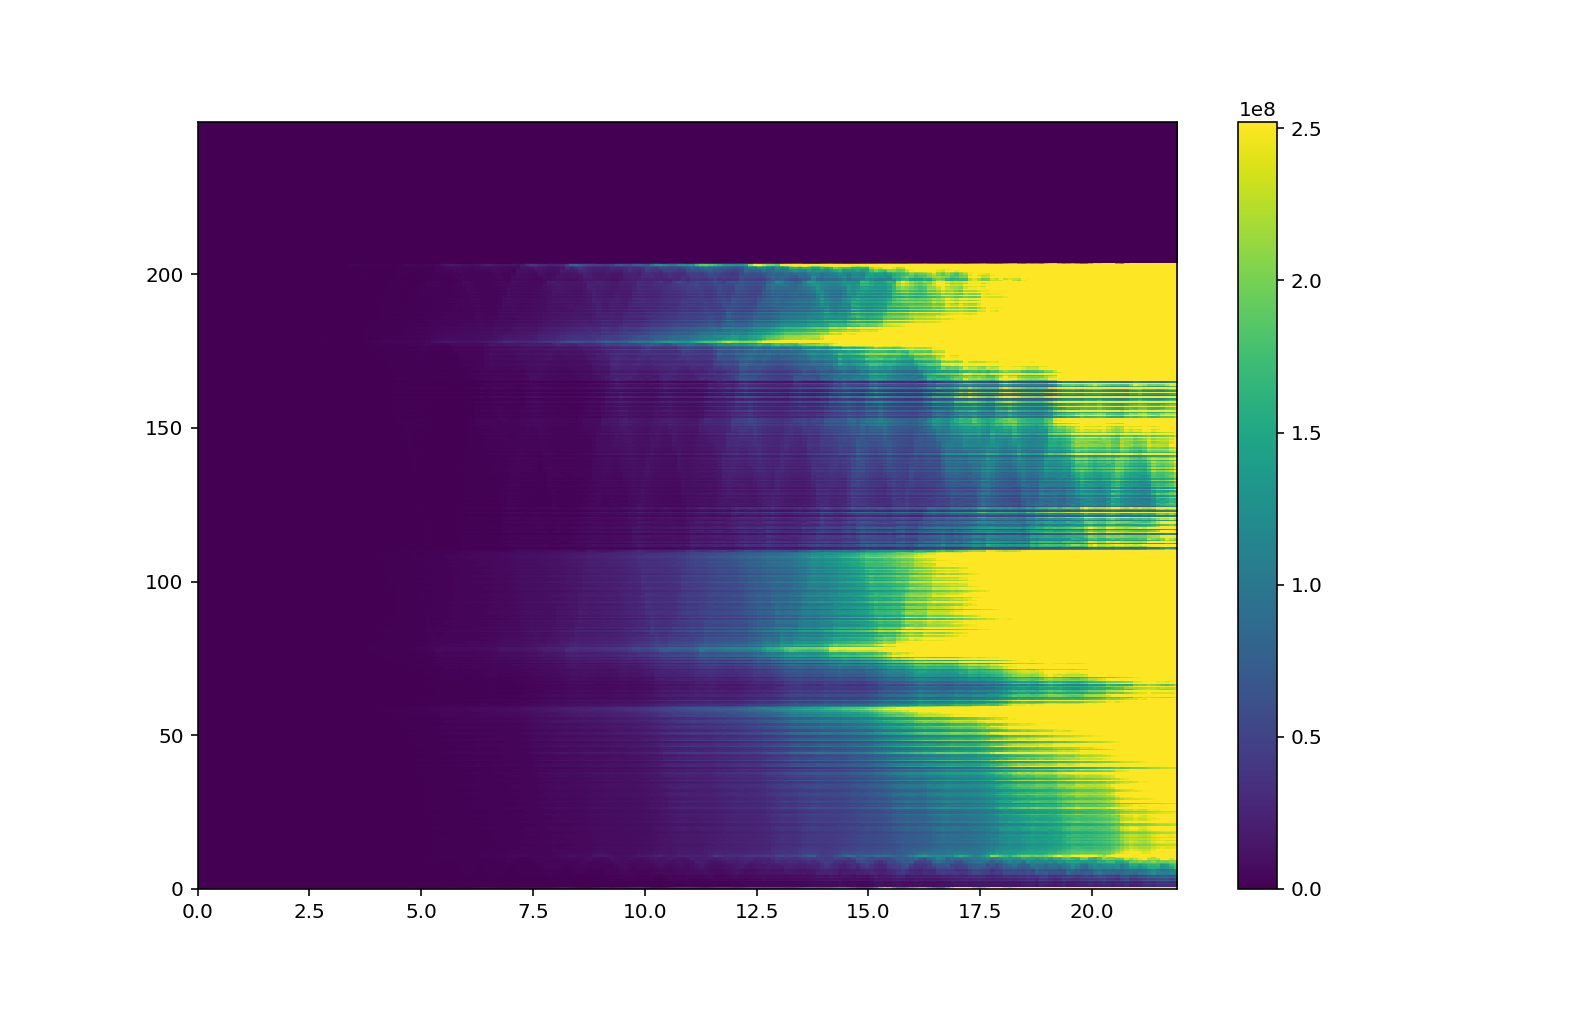

In [17]:
H.plot(IQEhist)

In [ ]:
H.plot(
    hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-300meV/iqe-interped.h5')[(0,23), (0,250)],
    min=0, max=60)